**PROVIAMO A MANIPOLARE IL DATASET**

In [52]:
%%capture
!pip install allensdk

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [54]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

# la classe BrainObservatoryCache serve a scaricare dataset neuroscientifici dall’Allen Institute, reparto Osservazioni di Cervelli

In [55]:
boc = BrainObservatoryCache() # creiamo un'istanza della classe

In [56]:
# Ottieniamo tutte le targeted_structure uniche
experiments = boc.get_ophys_experiments()
targeted_structures = sorted(set(exp['targeted_structure'] for exp in experiments))
print(targeted_structures)

# cerchiamo di capire che tipo di aree cerebrali abbiamo a disposizione!

['VISal', 'VISam', 'VISl', 'VISp', 'VISpm', 'VISrl']


In [57]:
from pprint import pprint # pretty print

pprint(experiments[:5])

[{'acquisition_age_days': 171,
  'cre_line': 'Slc17a7-IRES2-Cre',
  'donor_name': '479839',
  'experiment_container_id': 1018028049,
  'fail_eye_tracking': True,
  'id': 991852000,
  'imaging_depth': 171,
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'session_type': 'OPHYS_6_images_B',
  'specimen_name': 'Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93-479839',
  'targeted_structure': 'VISp'},
 {'acquisition_age_days': 100,
  'cre_line': 'Vip-IRES-Cre',
  'donor_name': '350249',
  'experiment_container_id': 646959440,
  'fail_eye_tracking': False,
  'id': 649409874,
  'imaging_depth': 175,
  'reporter_line': 'Ai148(TIT2L-GC6f-ICL-tTA2)',
  'session_type': 'three_session_A',
  'specimen_name': 'Vip-IRES-Cre;Ai148-350249',
  'targeted_structure': 'VISpm'},
 {'acquisition_age_days': 124,
  'cre_line': 'Slc17a7-IRES2-Cre',
  'donor_name': '361636',
  'experiment_container_id': 662358769,
  'fail_eye_tracking': False,
  'id': 663488086,
  'imaging_depth': 175,
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'ses

{'acquisition_age_days': 100,
  'cre_line': 'Vip-IRES-Cre',
  'donor_name': '350249',
  'experiment_container_id': 646959440,
  'fail_eye_tracking': False,
  'id': 649409874,
  'imaging_depth': 175,
  'reporter_line': 'Ai148(TIT2L-GC6f-ICL-tTA2)',
  'session_type': 'three_session_A',
  'specimen_name': 'Vip-IRES-Cre;Ai148-350249',
  'targeted_structure': 'VISpm'}

In [58]:
# session_id = 649409874
session_id = 501559087
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)

# il data_set rappresenta una singola sessione di imaging. 
# Contiene i dati registrati durante quell'esperimento: attività di neuroni, stimoli, metadati, comportamento del topo, ecc.

In [77]:
# ricaviamo le misurazioni

ts, dff = data_set.get_dff_traces()

# ts: "timestamp" (tempi)... quando è stata registrata ogni misura
# dff: "delta F/F" -> Matrice 2D dove ogni riga è un neurone e ogni colonna corrisponde ad un istante temporale diverso... 
#      i valori contenuti, quindi, sono l'INTENSITÀ di fluorescenza normalizzata (quanto è attivo il neurone in quel momento
#      Se dff = 0.1 significa "10% più luminoso del normale" = neurone più attivo.

dff

array([[0.20965546, 0.1863484 , 0.19161665, ..., 0.09774321, 0.11352707,
        0.13668476],
       [0.26439214, 0.20498341, 0.07929777, ..., 0.13164276, 0.1731477 ,
        0.04964808],
       [0.20654976, 0.24736755, 0.17095044, ..., 0.25507164, 0.22133712,
        0.33088112],
       ...,
       [0.14863771, 0.14606293, 0.17870486, ..., 0.11028486, 0.0950325 ,
        0.14673813],
       [0.20627266, 0.15208568, 0.07461747, ..., 0.17313483, 0.08793492,
        0.2939642 ],
       [0.23693745, 0.25396946, 0.0472189 , ..., 0.15417989, 0.16579214,
        0.1795123 ]], dtype=float32)

In [60]:
# Adesso ricaviamo i dati di movimento del topo

dxcm, tsd = data_set.get_running_speed()

# dxcm: array della velocità [centimetri al secondo]
# tsd: timestamp corrispondenti per la velocità

In [61]:
# Creiamo una tabella (DataFrame) con informazioni sui video mostrati (tempo inizio, tempo fine e tipo di video)

stim_epoch = data_set.get_stimulus_epoch_table()
stim_epoch

,stimulus,start,end
0,static_gratings,747,15196
1,natural_scenes,16100,30551
2,spontaneous,30701,39581
3,natural_scenes,39582,54050
4,static_gratings,54953,69403
5,natural_movie_one,70307,79338
6,natural_scenes,80241,96126
7,static_gratings,97406,113662


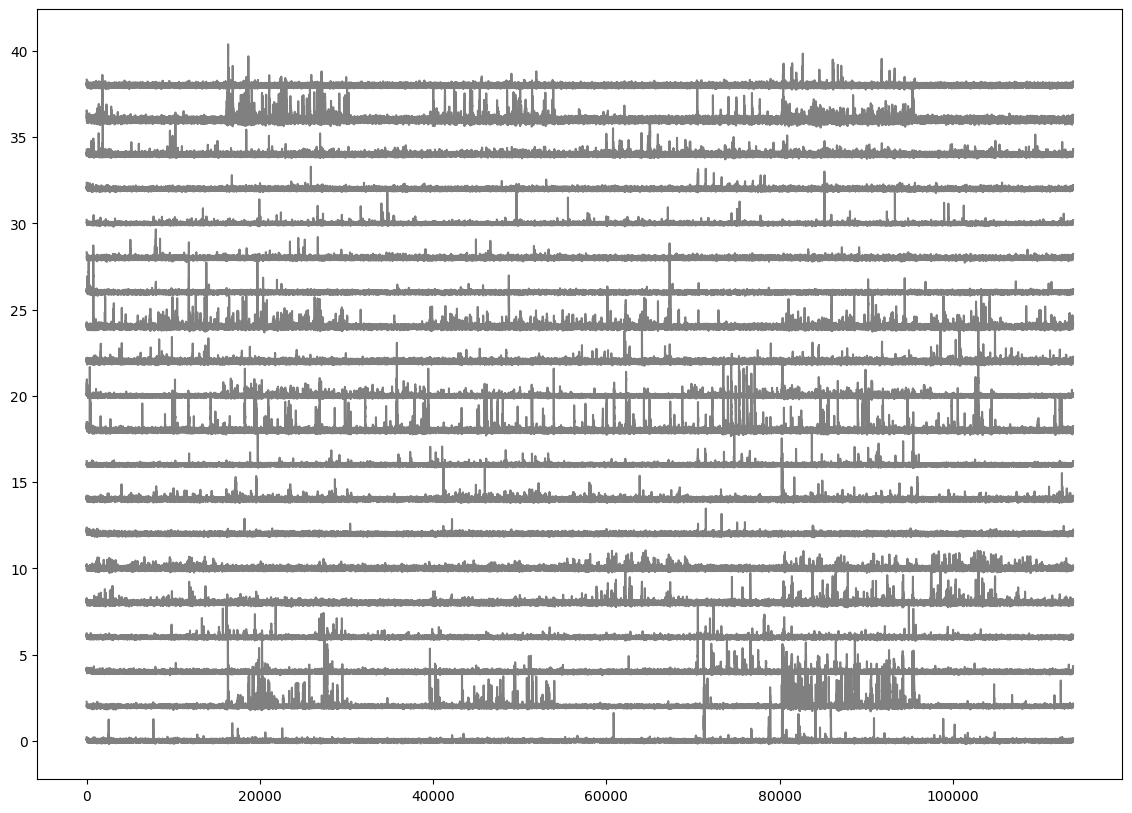

In [62]:
fig, ax = plt.subplots(figsize=(14,10))

for i in range(20): # per i primi 20 neuroni
    ax.plot(dff[i,:]+(i*2), color='gray')

In [65]:
ax.plot((0.2*dxcm)-20)


static_gratings blue
natural_scenes orange
spontaneous green
natural_movie_one red


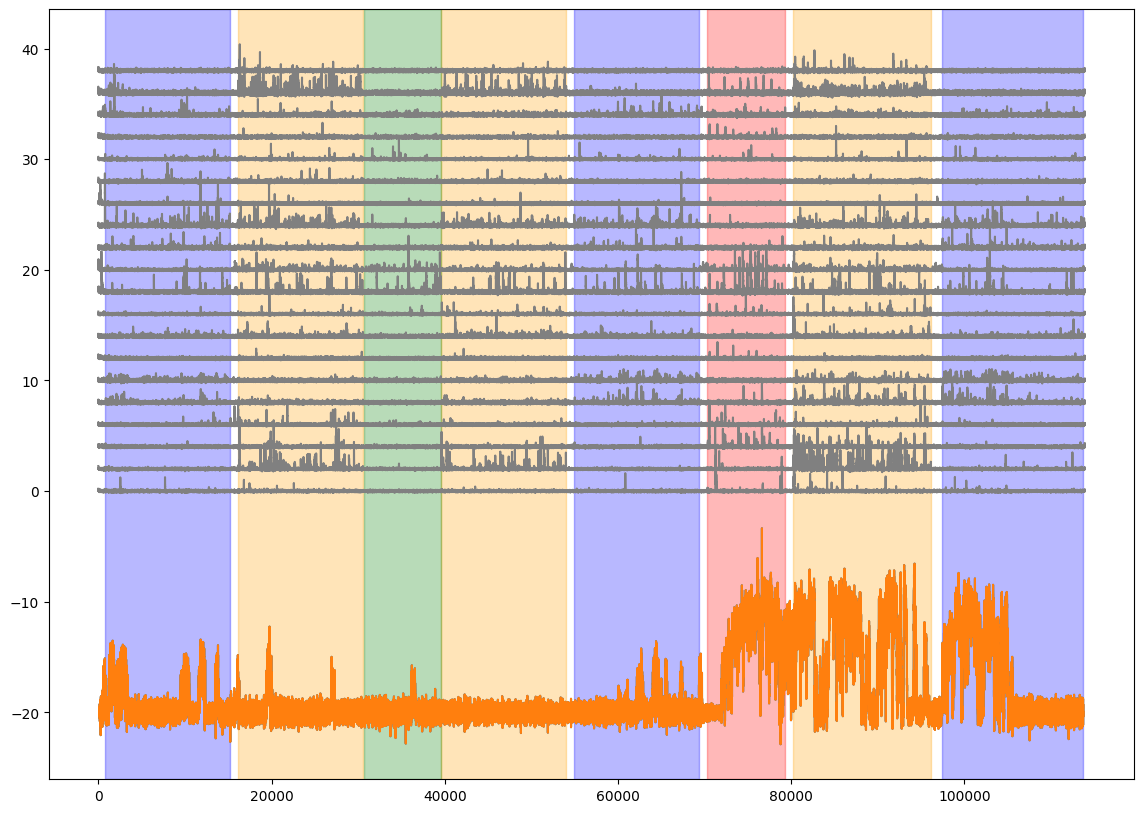

In [67]:
colors = ['blue','orange','green','red'] # COLORAZIONE DELLE STIMOLI

for color_index, stim_name in enumerate(stim_epoch.stimulus.unique()):
    color = colors[color_index]
    print(stim_name, color)
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        ax.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=color, alpha=0.1)

fig

 "DRIFTING_GRATINGS" -> RIGHE BIANCHE E NERE CHE SI MUOVONO
 "SPONTANEOUS" -> NESSUNO STIMOLO! 
 
Guardando il grafico, immediatamente DOPO la banda rossa (nessuno stimolo) si hanno picchi di movimento.

In [68]:
natural_scene_table = data_set.get_stimulus_table('natural_scenes')
natural_scene_table.head()

,frame,start,end
0,81,16100,16107
1,33,16108,16115
2,76,16115,16122
3,13,16123,16130
4,56,16130,16137


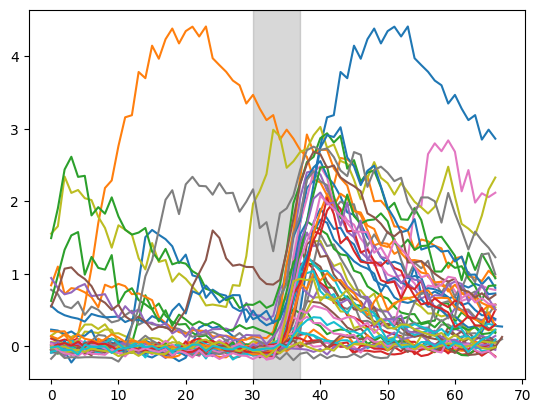

In [69]:
# SOVRAPPOSIZIONE DELLE RISPOSTE DI UN NEURONE AD UNA STESSA SCENA PROPOSTA IN MOMENTI DIVERSI

scene_number = 101
stim_subset = natural_scene_table[natural_scene_table.frame==scene_number]

cell_index = 1
for i in range(len(stim_subset)):
    plt.plot(dff[cell_index,stim_subset.start.iloc[i]-30:stim_subset.end.iloc[i]+30])

plt.axvspan(30,37, color='gray',alpha=0.3)

In [48]:
# Ogni esperimento è accompagnato da metadati: questi includono informazioni dettagliate sul soggetto sperimentale come 
# sesso, età, genotipo del topo, 
# parametri tecnici dell'acquisizione;

data_set.get_metadata()

{'sex': 'male',
 'targeted_structure': 'VISp',
 'ophys_experiment_id': 501559087,
 'experiment_container_id': 511510736,
 'excitation_lambda': '910 nanometers',
 'indicator': 'GCaMP6f',
 'fov': '400x400 microns (512 x 512 pixels)',
 'genotype': 'Cux2-CreERT2/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/Ai93(TITL-GCaMP6f)',
 'session_start_time': datetime.datetime(2016, 2, 4, 10, 25, 24),
 'session_type': 'three_session_B',
 'specimen_name': 'Cux2-CreERT2;Camk2a-tTA;Ai93-222426',
 'cre_line': 'Cux2-CreERT2/wt',
 'imaging_depth_um': 175,
 'age_days': 104,
 'device': 'Nikon A1R-MP multiphoton microscope',
 'device_name': 'CAM2P.2',
 'pipeline_version': '3.0'}

In [49]:
# Struttura organizzativa dei dati:
# L'Allen Brain Observatory contiene oltre 1300 sessioni di imaging che campionano 
# - 6 diverse aree corticali, 
# - 14 linee transgeniche Cre
# - 4 profondità corticali. 
# Il sistema è organizzato in "experiment containers" che raggruppano 3 sessioni di imaging 
# dello stesso gruppo di cellule, ciascuna con diversi tipi di stimoli visivi.

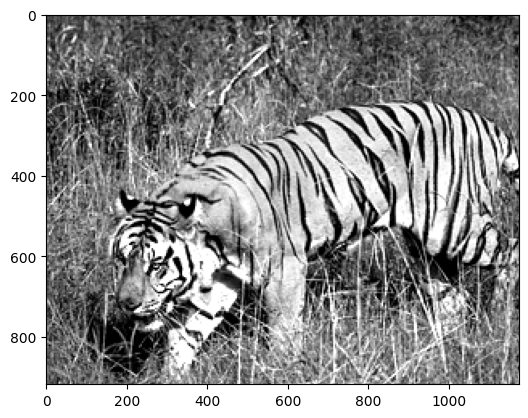

In [73]:
natural_scene_template = data_set.get_stimulus_template('natural_scenes')

plt.imshow(natural_scene_template[10,:,:], cmap='gray')